#  House Prices Dataset
---
**Name:** Ronald Wanjohi Gachoka <br>
**Student Number:** S2274825 <br>
**Course:** Software Development for Data Science <br>
**Assignment:** Coursework 1 <br>
**Program:** MSc Financial Technology 

## 1. Overview

This main objective of this coursework is to perform data analysis techniques on 2 datasets that are related to residential properties.

The goal of this project will be:
> - To understand the factors that influence property price
> - Determine which year had the highest property 
     - Which month was the best to sell a property 
> - What type of properties were the best to own based on their sale price and neighborhood

**Methodology**
To achieve these goals, the coursework will involve the following steps:
> - Data understanding
> - Data pre-processing (cleaning)
> - Univariate and bivariate analysis to understand relationships and trends
> - Visualizations
> - Conclusion


## 2. Data Understanding

The 2 datasets presented to us are from the sale of properties in a small town in USA between 2006 and 2010.

The first dataset describes individual elements of the residential properties from:
- lot coverage, number of bedrooms, type of foundation, zoning class amongst many more

The 2nd dataset is much smaller but describes:
- the parcel number, type of property and the price it was sold at.

**Important notes** (from data dictionary)
- To deal with some of the clear outliers, we are recommended to remove any properties with more than 4,000 square feet.

**Load libraries**

In [1]:
# Data analysis
import pandas as pd
import numpy as np

# Statistics
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Styling
sns.set_style("whitegrid")

In [44]:
# Importing data
housing_df = pd.read_csv("data/Housing_1.txt", sep="\t")
sales_df = pd.read_csv("data/Housing_2.txt", sep="\t")

# Replacing the space in columns names with "_"
housing_df.columns = housing_df.columns.str.replace(" ","_")
sales_df.columns = sales_df.columns.str.replace(" ","_")

# quick overview
housing_df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [45]:
sales_df.head()

,Order,PID,MS_SubClass,SalePrice
0,1,526301100,20,215000
1,2,526350040,20,105000
2,3,526351010,20,172000
3,4,526353030,20,244000
4,5,527105010,60,189900


Using .head() helps us quickly inspect the top 5 rows of both our datasets, and quickly assess several factor such as:
- Correct input in columns
- Supposed datatypes that are to be in the columns
- Potential issues

In [46]:
# Describe the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS_SubClass      2933 non-null   int64  
 3   MS_Zoning        2933 non-null   object 
 4   Lot_Frontage     2443 non-null   float64
 5   Lot_Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2933 non-null   object 
 9   Land_Contour     2933 non-null   object 
 10  Utilities        2933 non-null   object 
 11  Lot_Config       2933 non-null   object 
 12  Land_Slope       2933 non-null   object 
 13  Neighborhood     2933 non-null   object 
 14  Condition_1      2933 non-null   object 
 15  Condition_2      2933 non-null   object 
 16  Bldg_Type        2933 non-null   object 
 17  House_Style   

In [47]:
# Describe the data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Order        2933 non-null   int64
 1   PID          2933 non-null   int64
 2   MS_SubClass  2933 non-null   int64
 3   SalePrice    2933 non-null   int64
dtypes: int64(4)
memory usage: 91.8 KB


From the above lines of code, we see that:
- several columns have multiple missing values in the housing_df dataset
- some columns have the wrong data type
- there are no non-null values in the sales_df dataset



In [48]:
# Shape of the data
print("Shape of the housing dataset:")
housing_df.shape

Shape of the housing dataset:


(2933, 81)

In [49]:
print("Shape of the sales_df dataset:")
sales_df.shape

Shape of the sales_df dataset:


(2933, 4)

From the above lines of code, we see that: 
- housing_df has 2933 rows and 81 columns
- sales_df has 2933 rows and 4 columns

In [50]:
# Summary statistics
housing_df.describe()

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold
count,2933.000000,2.933000e+03,2933.000000,2443.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2910.000000,...,2932.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,69.237822,10147.789976,6.094102,5.562564,1971.344016,1984.241050,102.082818,...,472.749659,93.655984,47.501534,22.988067,2.589840,16.088987,2.241050,50.583362,6.270031,2007.792704
std,846.579702,1.887213e+08,42.632965,23.354888,7876.008408,1.410595,1.111114,30.232331,20.864849,179.172166,...,214.957946,126.332461,67.457316,64.110459,25.128602,56.171408,35.579037,566.056789,3.570864,1.317834
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,731.000000,5.284770e+08,20.000000,58.000000,7441.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1464.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071811e+08,70.000000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,120.000000,2010.000000


In [51]:
# Summary statistics
housing_df.describe(include="object")

,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
count,2933,2933,198,2933,2933,2933,2933,2933,2933,2933,...,2776,2774,2774,2774,2933,13,573,106,2933,2933
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2276,2921,120,1861,2636,2930,2143,2792,446,2524,...,1734,1233,2618,2668,2655,4,330,95,2539,2416


From the above summary statistics we can derive lots of useful information from this dataset (both numerical and categorical columns) such as:
- The maximum Order number is 2930 while we have 2933 rows, is column is useful look for duplicates
- Lot area has a maximum value of 215,245 while the average is 10,000. Check for outliers
    - This most likely has caused multiple columns to have really high maximum values/ outliers 
- The oldest house in the dataset was built in 1872, it would be interesting to see how much this was sold for
- The largest property has 8 bedrooms, identify which property this is and possibly its sale price compared to rest
- Within the categorical columns, we can see the number of unique values each column had as well as how many times the most frequent value appeared
    - This will be useful in identifying the most popular values within the dataset
    - We can also see the number of missing values within each column

In [52]:
# Summary statistics
sales_df.describe()

,Order,PID,MS_SubClass,SalePrice
count,2933.000000,2.933000e+03,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,180759.629731
std,846.579702,1.887213e+08,42.632965,79858.300395
min,1.000000,5.263011e+08,20.000000,12789.000000
25%,731.000000,5.284770e+08,20.000000,129500.000000
50%,1464.000000,5.354532e+08,50.000000,160000.000000
75%,2197.000000,9.071811e+08,70.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,755000.000000


Similar to the Housing_df, we can draw similar insights for Order, PID and MS_Subclass but we will confirm if all the output in both dataframes are identical later on.
Based of the sales_df summary statistics we can see that:
- There is also a discrepancy between the Order numbers and maximum value
- The average sale price is 180,000 while the max is 755,000 -> This could be an outlier, do more research

### Data Dictionary

The data dictionary is a useful tool to help us understand the data and the meaning of each column. This will help us understand the data better and help us identify any potential issues with the data.

In [53]:
# Identifying all object columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

MS_Zoning
Street
Alley
Lot_Shape
Land_Contour
Utilities
Lot_Config
Land_Slope
Neighborhood
Condition_1
Condition_2
Bldg_Type
House_Style
Roof_Style
Roof_Matl
Exterior_1st
Exterior_2nd
Mas_Vnr_Type
Exter_Qual
Exter_Cond
Foundation
Bsmt_Qual
Bsmt_Cond
Bsmt_Exposure
BsmtFin_Type_1
BsmtFin_Type_2
Heating
Heating_QC
Central_Air
Electrical
Kitchen_Qual
Functional
Fireplace_Qu
Garage_Type
Garage_Finish
Garage_Qual
Garage_Cond
Paved_Drive
Pool_QC
Fence
Misc_Feature
Sale_Type
Sale_Condition


From the above code, we can see that there are no object type columns in the dataset. From our analysis we'll need to change the following column to object type:
- MS_SubClass

In [54]:
# identifying all numeric columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
Lot_Frontage
Lot_Area
Overall_Qual
Overall_Cond
Year_Built
Year_Remod/Add
Mas_Vnr_Area
BsmtFin_SF_1
BsmtFin_SF_2
Bsmt_Unf_SF
Total_Bsmt_SF
1st_Flr_SF
2nd_Flr_SF
Low_Qual_Fin_SF
Gr_Liv_Area
Bsmt_Full_Bath
Bsmt_Half_Bath
Full_Bath
Half_Bath
Bedroom_AbvGr
Kitchen_AbvGr
TotRms_AbvGrd
Fireplaces
Garage_Yr_Blt
Garage_Cars
Garage_Area
Wood_Deck_SF
Open_Porch_SF
Enclosed_Porch
3Ssn_Porch
Screen_Porch
Pool_Area
Misc_Val
Mo_Sold
Yr_Sold


In [55]:
# Identifying all object columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

From the above code, we can see that there are no object type columns in the dataset. From our analysis we'll need to change the following column to object type:
- MS_SubClass

In [56]:
# identifying all numeric columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
SalePrice


Based of the code above, we can make the following conclusions about the variables we have in our dataset


|  **Variable**  |  **Description**  | **Type** | **Subtype** | 
|:--------------:|:-----------------:|:--------:|:-----------:|
| Order | Observation Number | Numerical |  Discrete   |
| PID | Parcel Identification Number | Numerical |   Nominal   |
| MS_SubClass | Identifies the type of dwelling involved in the sale | Numerical |   Nominal   |
| MS_Zoning | Identifies the general zoning classification of the sale | Categorical |   Nominal   |
| Lot_Frontage | Linear feet of street connected to property | Numerical | Continuous  |
| Lot_Area | Lot size in square feet | Numerical | Continuous  |
| Street | Type of road access to property | Categorical |   Nominal   |




## 3. Data Preparation

This stage will include:
- Merging the 2 datasets
- Data cleaning
    - Checking for outliers, missing values and duplicates
- Data transformation
    - Adjusting data types
    - Creating new columns from existing ones
    - Dropping columns that aren't crucial

**Merging Dataframes**

Before merging the dataframes, we need to ensure that we have matching PID and MS SubClass in both dataframes

In [57]:
# Comparing whether the PID values and MS Subclass are identical in both df

equal_pid = housing_df["PID"].isin(sales_df["PID"]).all()
equal_subclass = housing_df["MS_SubClass"].isin(sales_df["MS_SubClass"]).all()

if equal_pid and equal_subclass:
    print("Both PID and MS SubClass are identical in both df")
else:
    print("They aren't identical. Perform further analysis")

Both PID and MS SubClass are identical in both df


In [58]:
# Merging both the housing and sales dataframes
df = housing_df.merge(sales_df, on=["PID","MS_SubClass","Order"],
                             how="inner")
df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [59]:
# Checking the length of the dataframes
print(f"Length of the housing_df is: {len(housing_df)}")
print(f"Length of the sales_df is: {len(sales_df)}")
print(f"Length of the merged df is: {len(df)}")

Length of the housing_df is: 2933
Length of the sales_df is: 2933
Length of the merged df is: 2939


From the code above, we can see that the length of housing_df and sales_df were identical but during the merging an additional 6 rows were added. This will be addressed in the next section of the report


#### 3.1 Checking for outliers

This section of the report will look at outliers seen from the summary statistics conducted above. 
The benefit of checking for outliers and removing them, if need be, ensures that your data will no

Starting of we'll look at the distribution of lot sizes following the suggestion on the data dictionary

In [60]:
def plot_dist(df:pd.DataFrame, columns:str, title:str, xlabel:str, ylabel:str, kde:bool = True):
    """
    This function plot the distribution of the stated columns in a dataframe.
    
    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param xlabel: X label 
    :param ylabel: Y label
    
    :return: This function returns a box plot as well as a histogram
    """
    print("Summary statistics:")
    print(df[columns].describe())
    
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1,
                                          sharex=True, figsize=(8,4),
                                          gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[columns], ax=ax_box, color="salmon", orient="h")
    sns.histplot(df[columns], ax=ax_hist, color="steelblue", kde=kde)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.suptitle(title)
    

Summary statistics:
count    2939.000000
mean     1499.232052
std       504.883761
min       334.000000
25%      1126.500000
50%      1442.000000
75%      1741.000000
max      5642.000000
Name: Gr_Liv_Area, dtype: float64


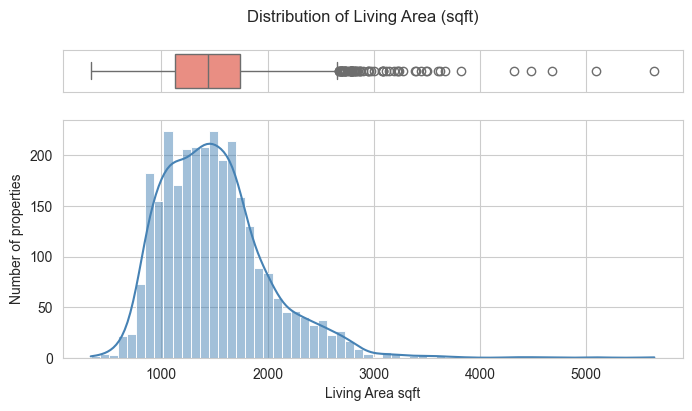

In [61]:
# Visualizing the living area
plot_dist(df, columns="Gr_Liv_Area", title="Distribution of Living Area (sqft)",
          xlabel="Living Area sqft", ylabel="Number of properties")

Similar observations can be made to what were in the special notes in the data dictionary. There are clear outliers in this dataset, finding houses with more than 4,000 sqft is highly unlikely. To confirm this we will follow the special notes and check the distribution between the "Sale Price" and "GR Liv Area".

Looking at the visualization above, we can also conclude that the data in the dataframe is right skewed, this could most likely be due to the outliers and other large properties

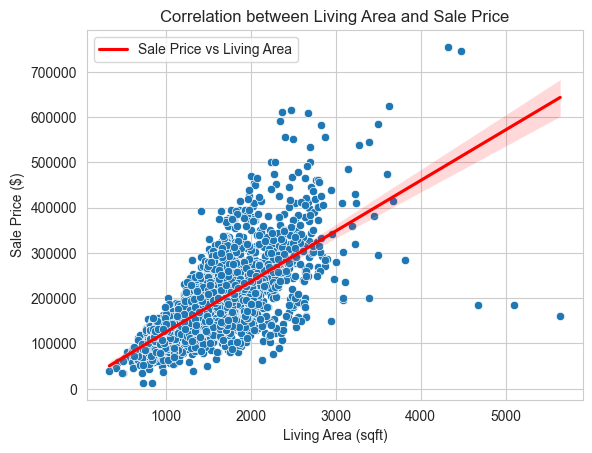

In [62]:
sns.scatterplot(data=df, x="Gr_Liv_Area", y="SalePrice")
sns.regplot(data=df, x="Gr_Liv_Area", y="SalePrice", scatter=False, 
            color="red", label="Sale Price vs Living Area")
plt.title("Correlation between Living Area and Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)")
plt.legend();

Looking at the graph above, we can share the same conclusions with the special note that we should drop houses with a Gr Living Area greater than 4000.
We see that 3 properties have really high living areas > 4000 but low sale prices, and secondly, 2 more properties with > 4000 living area and really high sales prices.

We can also see that there is a positive correlation between the living area and sales price of a property. 

In [63]:
df.drop(df[df["Gr_Liv_Area"]>4000].index, inplace=True)

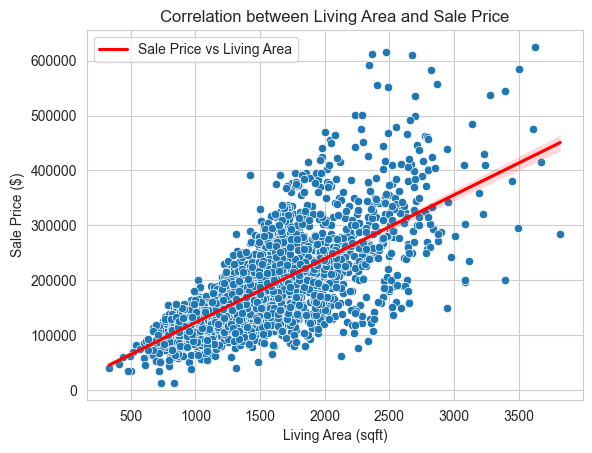

In [64]:
sns.scatterplot(data=df, x="Gr_Liv_Area", y="SalePrice")
sns.regplot(data=df, x="Gr_Liv_Area", y="SalePrice", scatter=False, 
            color="red", label="Sale Price vs Living Area")
plt.title("Correlation between Living Area and Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)")
plt.legend();

From the graph above, we can see that the outliers have been removed and the data is much more representative of the data. 
We can also see that the correlation between the living area and sale price is positive and strong. This makes sense as the larger the living area, the more expensive a property will be.

While we still had the outlier within the dataset vs when we removed them, the line of best fit did not change much as there are a lot more properties with a living area of less than 3000 sqft and 5 outliers would have little effect on that.

Summary statistics:
count      2934.000000
mean      10103.324131
std        7770.118552
min        1300.000000
25%        7442.250000
50%        9432.000000
75%       11500.000000
max      215245.000000
Name: Lot_Area, dtype: float64


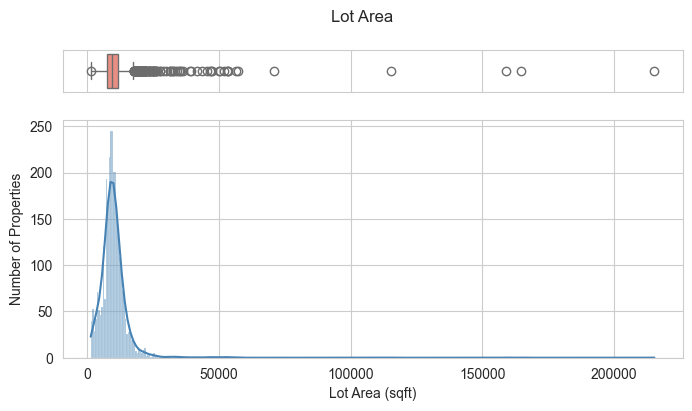

In [65]:
# Looking for outliers within Lot Area
plot_dist(df, columns="Lot_Area", title="Lot Area",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the graph above, we can see that there are multiple outliers as the 75th percentile lot areas within the data is 11,500 sqft but there are a few more properties all the way up to and above 200,000 sqft.

We will drop all properties that are outside 99.7% of the data or greater than 3 standard deviations away from the mean. The use of 99.7% or a Z_Score of 3 is a statistically used method to identify outliers within any dataset (BecomingHuman.ai, 2020).

Summary statistics:
count     2908.000000
mean      9617.009285
std       3990.956544
min       1300.000000
25%       7420.000000
50%       9375.000000
75%      11425.250000
max      33120.000000
Name: Lot_Area, dtype: float64


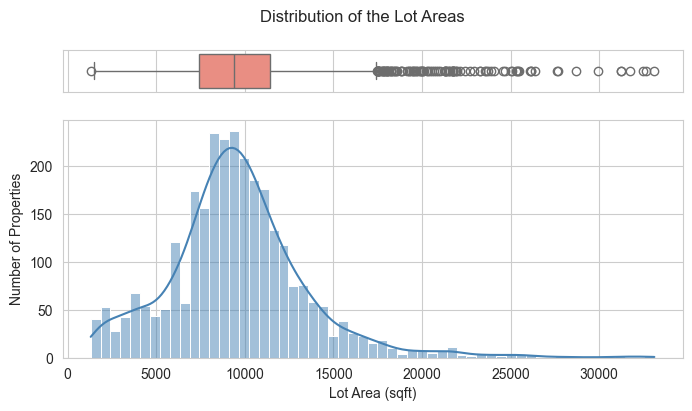

In [66]:
# Calculating the Z-scores for Lot_Area
z_score = stats.zscore(df["Lot_Area"])

# Setting threshold
z_score_threshold = 3

# Outliers
lot_area_outliers = abs(z_score) > z_score_threshold

# Removing outliers
df = df[~lot_area_outliers]

# Graphing the plot to see changes
plot_dist(df, columns="Lot_Area", title="Distribution of the Lot Areas",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the new plot above and summary statistics we see that the maximum lot area has drastically dropped from 215,000 sqft to 33,000 sqft. This ensures that all the properties within the dataset fall within 99.7% of the dataset.

From the above plots we can now accurately see the plot is right skewed and can also see clearly where the 50% percentile of the data falls, close to 10,000 sqft.
Doing so has also reduced the number of properties in our dataset from 2934 to 2908.
We can also be comfortable with the change as the summary statistics for the lot_area will be more accurate and representative of the data. without such massive outliers.

#### 3.2. Checking for missing values
This section of the report will look at the missing values within the dataset and how to deal with them.

In [67]:
# Total number of NA values
df.isna().sum().sum()

15625

The total number of NA values in our merged dataset is 15,626. This is due to most likely have more than 1 NA value in each row. 

We will deal with the NA in different ways depending on the column:
1. Either drop the NA values
2. Impute the missing values
3. Do nothing to them

In [68]:
# Columns with na values
nan_columns = df.columns[df.isna().any()].tolist()

# Sum of the na values in the dataset
nan_values = df[nan_columns].isna().sum()

# Percentage of na values
nan_percentage = (nan_values / len(df)) * 100

# Creating a dataframe to display the results
nan_df = pd.DataFrame({"NA values": nan_values,
                       "Percentage of NA values": nan_percentage})

# Sorting the dataframe
nan_df.sort_values(by="Percentage of NA values", ascending=False, inplace=True)
nan_df

,NA values,Percentage of NA values
Pool_QC,2898,99.656121
Misc_Feature,2805,96.458047
Alley,2710,93.191197
Fence,2336,80.330124
Mas_Vnr_Type,1758,60.453920
Fireplace_Qu,1420,48.830812
Lot_Frontage,479,16.471802
Garage_Cond,159,5.467675
Garage_Qual,159,5.467675
Garage_Finish,159,5.467675


Looking at the above dataframe, we can see the amount of NA values in the dataset as well as its proportion to the whole dataset. 
For this project, we will drop all columns with more than 10% of missing values. This is because we have a large dataset and imputing over them will cause a lot of noise in the data.


In [69]:
# Dropping columns with more than 10% of NA values
# Columns to drop
columns_to_drop = nan_df[nan_df["Percentage of NA values"] > 10].index.tolist()
print(columns_to_drop)

# Drop columns
housing_df.drop(columns=columns_to_drop, inplace=True)

print(f"Number of columns in the dataset was: {len(housing_df.columns) + len(columns_to_drop)}")
print(f"Number of columns to drop is: {len(columns_to_drop)}")
print(f"Number of columns in the updated dataset is: {len(housing_df.columns)}")

['Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Mas_Vnr_Type', 'Fireplace_Qu', 'Lot_Frontage']
Number of columns in the dataset was: 81
Number of columns to drop is: 7
Number of columns in the updated dataset is: 74


In [70]:
# Update nan_df 
nan_df = nan_df[~nan_df.index.isin(columns_to_drop)]

# Updating the original df
df = df.drop(columns=columns_to_drop)

# Checking the shape of the df
df.shape

(2908, 75)

Looking at the shape of the original df, we can see that the number of columns has dropped from 81 to 75. This is because we dropped the columns that had more than 10% of missing values.


##### 3.2.1 Columns to leave as is

From the above dataframe, there are still columns with missing values but they account for less than 5% of the dataset within each column. Rather than dropping these columns, we will look into them and decide whether we will try interpolate the missing values or leave them as is. 

The missing values will be dealt with on a column by column basis as it makes sense for some columns to have no values within them.

The first set of missing values we will deal with are columns that are correctly labelled as NA.
How we identified columns labeled as NA, is by going through the data dictionary provided and seeing if any columns were meant to have an NA value (eg. If property had no basement, the basement columns would be NA)

In [71]:
# Correctly labelled NA values
col_list = ["Bsmt_Qual","Bsmt_Cond","Bsmt_Exposure","BsmtFin_Type_1",
            "BsmtFin_Type_2","Garage_Type","Garage_Finish","Garage_Qual",
            "Garage_Cond"]

# Remove the columns from the nan_df
nan_df = nan_df[~nan_df.index.isin(col_list)]

# View the updated df
nan_df


,NA values,Percentage of NA values
Garage_Yr_Blt,159,5.467675
Mas_Vnr_Area,23,0.790922
BsmtFin_SF_1,1,0.034388
Bsmt_Half_Bath,1,0.034388
Bsmt_Full_Bath,1,0.034388
Garage_Cars,1,0.034388
Garage_Area,1,0.034388
Total_Bsmt_SF,1,0.034388
Bsmt_Unf_SF,1,0.034388
BsmtFin_SF_2,1,0.034388


Based of the updated dataframe, we can see that the columns above consist of values that can now be imputed with the correct values.
The 2 main imputation methods we will use will be either:
1. Mean
2. Median


##### 3.2.2 Imputing missing values
Kumar (2023) gives us a guide on which method to use for imputing missing values depending on the type of data we have.
- **Mean Imputation**  is used for continuous data that is normally distributed
- **Median Imputation** is used for continuous data that is skewed as it is less sensitive to outliers
- **Mode Imputation** is used for categorical data

In [72]:
# Median Imputation
median_cols = ["Garage_Yr_Blt", "Bsmt_Full_Bath", "Bsmt_Half_Bath", "Garage_Cars"]

for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)
    
df[median_cols].isna().sum()

Garage_Yr_Blt     0
Bsmt_Full_Bath    0
Bsmt_Half_Bath    0
Garage_Cars       0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the median values and we no longer have NA values present. 

We chose to use median imputation for these columns as for the "Garage_Yr_Blt" column, it made most sense to fill it with a year that was within the dataset rather than a year that was not present in the dataset (mean year which can be e.g. 2000.5 or 2000.2).

That was the same reasoning used for the selection of the other columns as they were discrete and we would expect similar discrete values to be present in the dataset after imputation.

In [73]:
# Mean Imputation
mean_cols = ["Mas_Vnr_Area","BsmtFin_SF_1", "BsmtFin_SF_2", "Bsmt_Unf_SF",
             "Total_Bsmt_SF", "Garage_Area"]
          
for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)
    
df[mean_cols].isna().sum()

Mas_Vnr_Area     0
BsmtFin_SF_1     0
BsmtFin_SF_2     0
Bsmt_Unf_SF      0
Total_Bsmt_SF    0
Garage_Area      0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the mean values and we no longer have NA values present.
We decided to use mean imputation for these columns as they were continuous (this  and we would expect similar continuous values to be present in the dataset after imputation.

#### 3.3 Checking for duplicates

This stage of the data preparation will look at a few columns to see if there are any duplicates within the dataset.

In [74]:
df["PID"].duplicated().sum()

9

In [75]:
# Print out the duplicated PID values
df[df.duplicated(subset=["PID","Year_Built","Yr_Sold"], keep=False)]

,Order,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
145,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,0,0,143,0,0,4,2010,WD,Normal,167500
146,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,0,0,143,0,0,4,2010,WD,Normal,167500
147,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,0,0,143,0,0,4,2010,WD,Normal,167500
148,146,535175070,20,RL,9300,Pave,Reg,Lvl,AllPub,Inside,...,0,0,143,0,0,4,2010,WD,Normal,167500
149,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,108538
150,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,108538
151,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,108538
152,147,535175180,20,RL,10725,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,108538
153,148,535179020,20,RL,10032,Pave,Reg,Lvl,AllPub,Inside,...,0,0,160,0,0,6,2010,WD,Normal,159500
154,148,535179020,20,RL,10032,Pave,Reg,Lvl,AllPub,Inside,...,0,0,160,0,0,6,2010,WD,Normal,159500


Looking at the analysis above, we can see that there are 3 duplicated PID values. 
After analysing the duplicated columns, we see that the duplicated values are entirely identical across  all columns and this duplication occurred mostly during the merging of the 2 datasets and possibly some small difference e.g. the formatting of the data.

We will therefore drop these rows from the dataset and keep only the first instance of the duplicated rows as it will not impact our analysis of the data. 

In [76]:
# Dropping the duplicated rows except the first instance
df.drop_duplicates(subset=["PID","Year_Built","Yr_Sold","SalePrice"], keep="first", inplace=True)

# Checking if the duplicates have been dropped
df["PID"].duplicated().sum()

0

#### 3.4. Data Transformation

This stage of the project will look at:
- Creating new columns from the already existing ones
- Dropping columns that aren't needed
- Selecting columns that are needed for our analysis

##### 3.4.1 Creating new columns

We will create a new column to help us understand the age of the property at the time of its sale. This will help us understand if the age of the property has any effect on the price of the property.

In [77]:
df["House_Sale_Age"] = df["Yr_Sold"] - df["Year_Built"]
df["House_Sale_Age"].head()

0    50
1    49
2    52
3    42
4    13
Name: House_Sale_Age, dtype: int64

##### 3.4.2 Dropping Columns

The first set of columns we will drop are columns that will add little to no value in our analysis.

In [78]:
# Dropping Columns
cols_to_drop = ["Order","PID"]

df.drop(columns=cols_to_drop, inplace=True)
df.head()

,MS_SubClass,MS_Zoning,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,...,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,House_Sale_Age
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,5,2010,WD,Normal,215000,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,120,0,0,6,2010,WD,Normal,105000,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,12500,6,2010,WD,Normal,172000,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,4,2010,WD,Normal,244000,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,3,2010,WD,Normal,189900,13


We dropped the columns above because they were not needed for our analysis.
- With Order we dropped them as with them being just an observation number, no meaningful analysis could be drawn from them.
- With PID, we dropped it as it was just a parcel identification number and would not help us in our analysis


##### 3.4.3 Updating Column Values (Month)

This section will update the values in the column to their respective month names.


In [80]:
# Creating a dictionary to map the month number to the month name

month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June",
              7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}

# Updating the values in the column
df["Mo_Sold"] = df["Mo_Sold"].map(month_dict)

# Checking the updated column
df["Mo_Sold"].head()

0      May
1     June
2     June
3    April
4    March
Name: Mo_Sold, dtype: object

##### 3.4.5 Selecting columns for analysis

This section of the report will look at the columns that will be used for our analysis. 


In [81]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,...,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,House_Sale_Age
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,May,2010,WD,Normal,215000,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,120,0,0,June,2010,WD,Normal,105000,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,12500,June,2010,WD,Normal,172000,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,April,2010,WD,Normal,244000,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,March,2010,WD,Normal,189900,13


In [92]:
# Columns to keep

columns_to_keep = ["Overall_Cond","Neighborhood","Lot_Area","MS_SubClass","House_Style",
                   "1st_Flr_SF","2nd_Flr_SF", "Gr_Liv_Area","TotRms_AbvGrd","Full_Bath",
                   "Year_Built","Mo_Sold","Yr_Sold", "House_Sale_Age","SalePrice"]

# Creating a new df with the columns we need
new_df = df[columns_to_keep]

# Overview
new_df.head()

,Overall_Cond,Neighborhood,Lot_Area,MS_SubClass,House_Style,1st_Flr_SF,2nd_Flr_SF,Gr_Liv_Area,TotRms_AbvGrd,Full_Bath,Year_Built,Mo_Sold,Yr_Sold,House_Sale_Age,SalePrice
0,5,NAmes,31770,20,1Story,1656,0,1656,7,1,1960,May,2010,50,215000
1,6,NAmes,11622,20,1Story,896,0,896,5,1,1961,June,2010,49,105000
2,6,NAmes,14267,20,1Story,1329,0,1329,6,1,1958,June,2010,52,172000
3,5,NAmes,11160,20,1Story,2110,0,2110,8,2,1968,April,2010,42,244000
4,5,Gilbert,13830,60,2Story,928,701,1629,6,2,1997,March,2010,13,189900


We have selected the above columns for our analysis as they are the most relevant to our analysis and would be what most people would look at before buying or selling a house.
This can be seen by looking at a report published by Whitegates (2022) in the UK that showed the most important real estate agents look for when they are valuing a property.

In addition, these columns would also be the most beneficial in answering the questions we set out to answer in the beginning of the report. 

## 4. Data Analysis

This section of the report will look at the following:
- Univariate analysis
- Bivariate analysis
- Multivariate analysis (if necessary)

### 4.1 Univariate Analysis

This section of the report will look at the distribution of the data within the dataset. This will help us understand the data better and draw any meaningful conclusions from it.

This section will be divided into 2 parts:
1. Numerical variables
2. Categorical variables

#### 4.1.1 Numerical variables

This section of the report will look at the distribution of the numerical variables within the dataset.


In [85]:
# Overview of the dataset
new_df.head()

,Overall_Cond,Neighborhood,Lot_Area,MS_SubClass,House_Style,Gr_Liv_Area,TotRms_AbvGrd,Full_Bath,Year_Built,Mo_Sold,Yr_Sold,House_Sale_Age,SalePrice
0,5,NAmes,31770,20,1Story,1656,7,1,1960,May,2010,50,215000
1,6,NAmes,11622,20,1Story,896,5,1,1961,June,2010,49,105000
2,6,NAmes,14267,20,1Story,1329,6,1,1958,June,2010,52,172000
3,5,NAmes,11160,20,1Story,2110,8,2,1968,April,2010,42,244000
4,5,Gilbert,13830,60,2Story,1629,6,2,1997,March,2010,13,189900


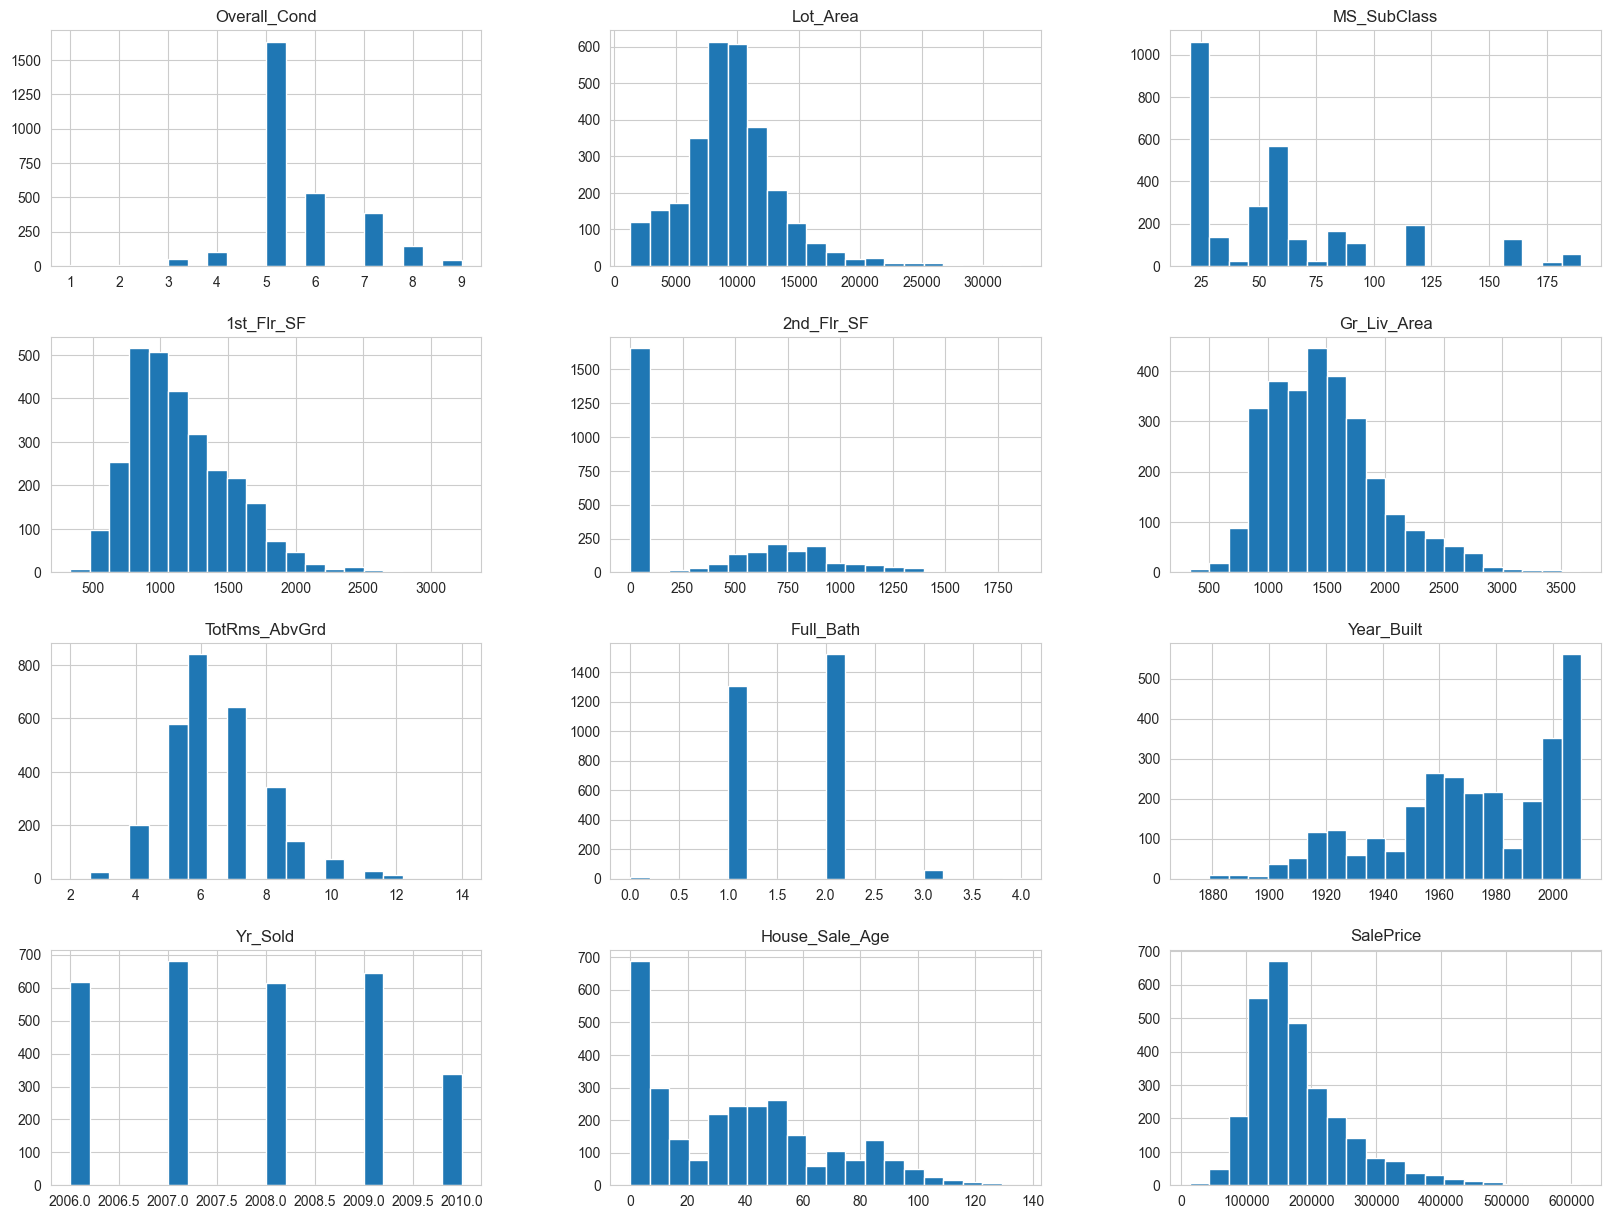

In [93]:
## Quick overview of the distribution within the dataset

new_df.hist(figsize=(20,15), bins=20)
plt.show()

The chart above gives us a quick glimpse of the distribution of the numerical variables within the dataset. 

We will dive deeper into the above columns and look at the distribution of each column individually and derive any meaningful insights from them.

Summary statistics:
count    2899.000000
mean        5.565367
std         1.110581
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall_Cond, dtype: float64


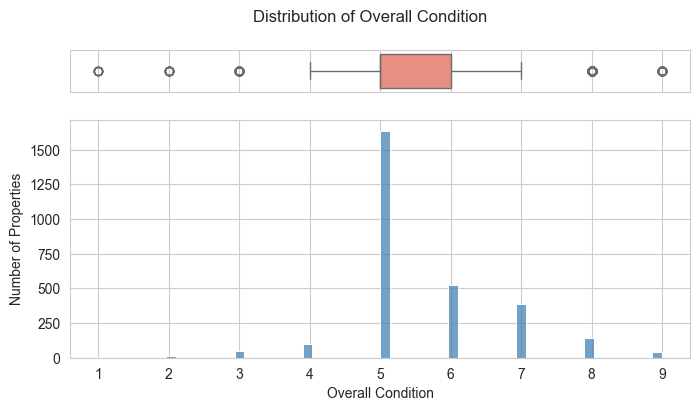

In [89]:
# Overall Condition

plot_dist(new_df, columns="Overall_Cond", title="Distribution of Overall Condition",
          xlabel="Overall Condition", ylabel="Number of Properties", kde=False)

Based of the graph and summary statistics above, we see that most properties (over 1,500) have an overall condition of 5 which is "Average" followed by an overall condition of 6 ("Above Average") with only 500 properties. We can also see that properties with an overall rating of less than 4 or greater than 7 are very few in number.

It would be interesting to see if the overall condition of a property has any effect on the price of the property.

Summary statistics:
count     2899.000000
mean      9615.761297
std       3996.954394
min       1300.000000
25%       7411.000000
50%       9375.000000
75%      11427.000000
max      33120.000000
Name: Lot_Area, dtype: float64


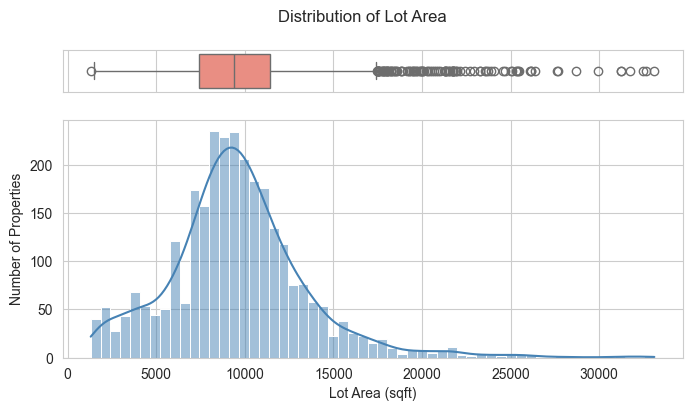

In [90]:
# Lot Area

plot_dist(new_df, columns="Lot_Area", title="Distribution of Lot Area",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the above graph, we can see that the distribution of the lot area is right skewed. This is due to the outliers that are still in the dataset, such as properties with lot areas greater than 20,000 sqft. We see that average lot area is 9,615 sqft and from the chart we can see that most properties were within this range. 

Looking at the summary statistics, we can also see that the maximum lot area is 33,000 sqft which is a lot more realistic than the previous 215,000 sqft before outliers were removed. We can also see that the data is almost a normal distribution with the mean and median being very close to each other.

Summary statistics:
count    2899.000000
mean       57.462918
std        42.554981
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MS_SubClass_x, dtype: float64


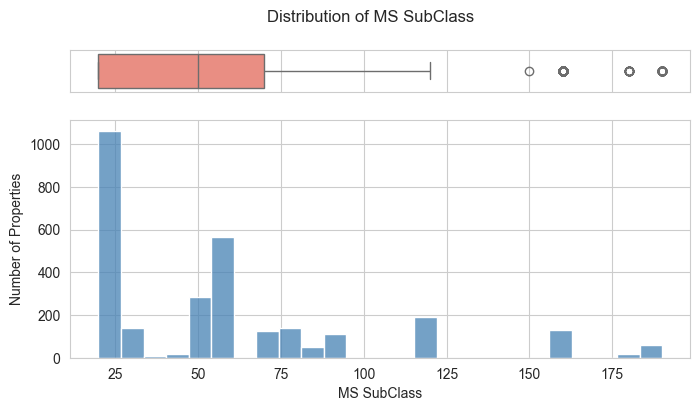

In [50]:
# MS_SubClass

plot_dist(new_df, columns="MS_SubClass_x", title="Distribution of MS SubClass",
          xlabel="MS SubClass", ylabel="Number of Properties", kde=False)

From the above graph, we can see that the most common MS SubClass is 20, followed by 60 and 50. From the data dictionary we can see that the most popular sub_class is 20 which is a "1 story 1946 and newer all styles". This makes sense as most people would prefer a 1 story house as it is usually cheaper to purchase or build and is easier to maintain.

We can also see that the median type of property in the sales is 50 which is a "1.5 story finished all ages". with fewer people living in a sub_class greater than 70.

This raises the question of whether the price of the property is affected by the type of property/sub_class it is. We will look at this in the bivariate analysis section of the report.

Summary statistics:
count     2899.000000
mean      9615.761297
std       3996.954394
min       1300.000000
25%       7411.000000
50%       9375.000000
75%      11427.000000
max      33120.000000
Name: Lot_Area, dtype: float64


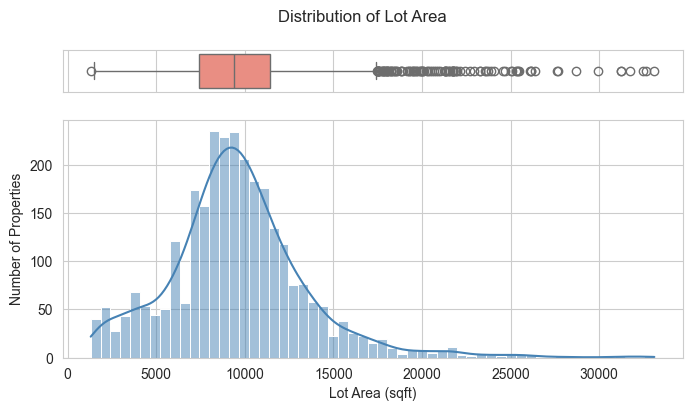

In [51]:
# Lot Area

plot_dist(new_df, columns="Lot_Area", title="Distribution of Lot Area",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the above graph, we can see that the distribution of the lot area is right skewed. This is due to the outliers that were present in the dataset and were removed in the data preparation section of the report. We see that average lot area is 9,615 sqft and from the chart we can see that most properties were within this range. 

Looking at the summary statistics, we can see that the maximum lot area is 33,000 sqft which is a lot more realistic than the previous 215,000 sqft. We can also see that the data is almost a normal distribution with the mean and median being very close to each other.

Summary statistics:
count    2899.000000
mean     1150.720938
std       371.733608
min       334.000000
25%       874.000000
50%      1080.000000
75%      1375.500000
max      3228.000000
Name: 1st_Flr_SF, dtype: float64


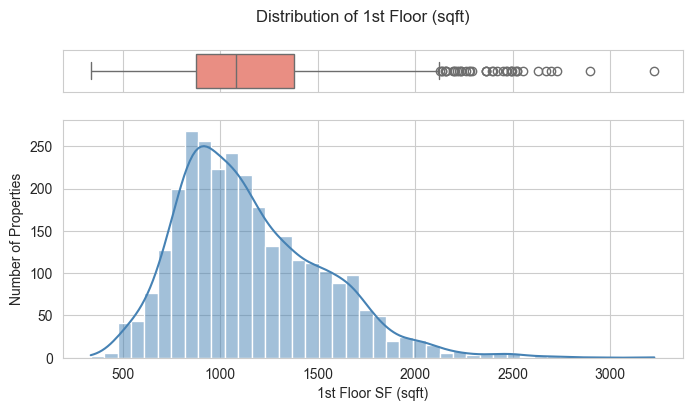

In [52]:
# 1st Floor SF

plot_dist(new_df, columns="1st_Flr_SF", title="Distribution of 1st Floor (sqft)",
          xlabel="1st Floor SF (sqft)", ylabel="Number of Properties")

We included this column to assess the distribution of the 1st floor area. We can see that the distribution is right skewed and most properties have a 1st floor area of about 1,000 sqft. 75% of the properties have a 1st floor area of 1,375 sqft and below. We see that there are a few properties with a sqft greater than 2,500 sqft but they are very few in number. 

Summary statistics:
count    2899.000000
mean      334.196620
std       424.917119
min         0.000000
25%         0.000000
50%         0.000000
75%       703.000000
max      1862.000000
Name: 2nd_Flr_SF, dtype: float64


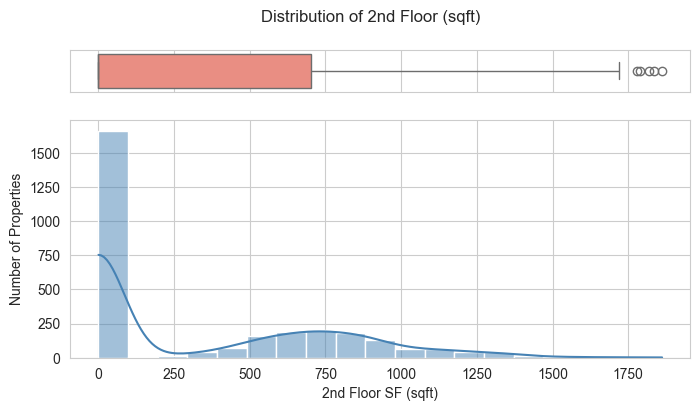

In [53]:
# 2nd Floor SF

plot_dist(new_df, columns="2nd_Flr_SF", title="Distribution of 2nd Floor (sqft)",
          xlabel="2nd Floor SF (sqft)", ylabel="Number of Properties")

In contrast to the 1st floor sqft. We can see the number of properties with a 2nd floor are very few in number. Over 50% of the properties do not have a 2nd floor, while 75% of the properties have a 2nd floor area of 700 sqft and below. This leaves us with a few properties with a 2nd floor area of 1,000 sqft and above, which may imply a high price for the property.

Summary statistics:
count    2899.000000
mean     1489.644360
std       482.198915
min       334.000000
25%      1122.500000
50%      1440.000000
75%      1737.000000
max      3672.000000
Name: Gr_Liv_Area, dtype: float64


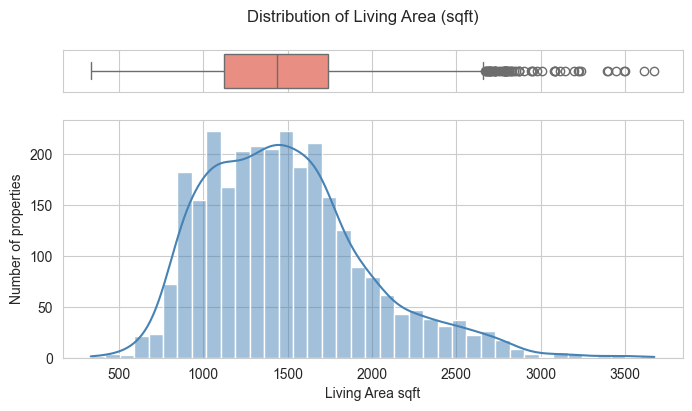

In [54]:
# Gr Liv Area

plot_dist(new_df, columns="Gr_Liv_Area", title="Distribution of Living Area (sqft)",
          xlabel="Living Area sqft", ylabel="Number of properties")

As discussed above, we can see that the distribution is slightly skewed to the right. Despite how the graph looks, the summary statistics show that the mean and median are very close to each other. This implies that the data is (near) normally distributed.

We can see that the average living area is just about 1,500 sqft and 75% of the properties have a living area of 1,737 sqft and below. This implies that most properties are small in size and the larger properties are also fewer in number, which makes sense.

Summary statistics:
count    2899.000000
mean        6.428079
std         1.551703
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRms_AbvGrd, dtype: float64


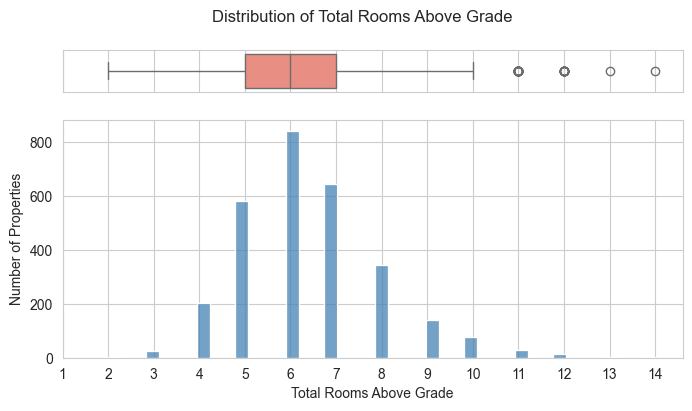

In [99]:
# TotRms_AbvGrd

plot_dist(new_df, columns="TotRms_AbvGrd", title="Distribution of Total Rooms Above Grade",
          xlabel="Total Rooms Above Grade", ylabel="Number of Properties", kde=False)
plt.xticks(np.arange(1,15,1));

The distribution above shows the number of rooms in a property that were above grade and excludes bathrooms. We can see that the most common number of rooms above grade in a property is 6 (just above 800 properties). The distribution above is also skewed to the right as fewer properties have more than 7 rooms above grade, with only 1 having 14 rooms above grade, which is quite exceptional. 

It would make sense to assume the more rooms above grade the higher the sales price of the property. We will look at this in the bivariate analysis section of the report.

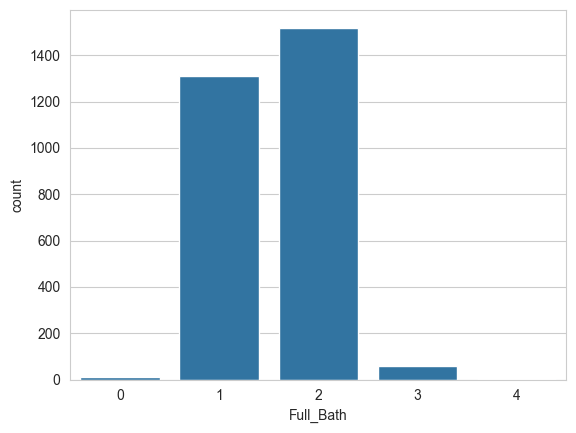

In [73]:
# Full Bath
sns.countplot(data=new_df, x="Full_Bath")
plt.xticks(np.arange(0,5,1));

In [95]:
new_df["Full_Bath"].value_counts()

Full_Bath
2    1519
1    1308
3      57
0      11
4       4
Name: count, dtype: int64

From the distribution above and the value_counts, we can see that 1,519 properties have 2 full bathrooms, followed by 1,308 properties having 1 full bathroom. What's interesting is that there are 11 houses with no baths, which is very unlikely. We will look at this in the bivariate analysis section of the report.


Summary statistics:
count    2899.000000
mean     1971.364953
std        30.286428
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: Year_Built, dtype: float64


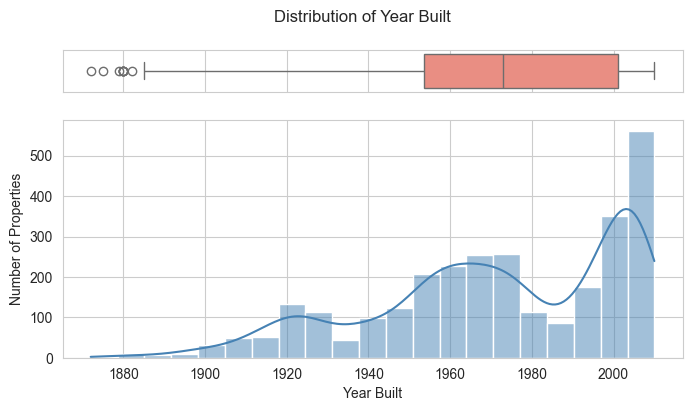

In [96]:
# Year Built
plot_dist(new_df, columns="Year_Built", title="Distribution of Year Built",
          xlabel="Year Built", ylabel="Number of Properties")

From the graph above and the summary statistics we can see that the average year a property was built was 1971. We can also see that the oldest property was built in 1872 and the newest property was built in 2010. There's also a relatively cyclical rise in the number of properties built over the years.

It would be interesting to see if the year a property was built has any effect on the price of the property. We will look at this in the bivariate analysis section of the report.

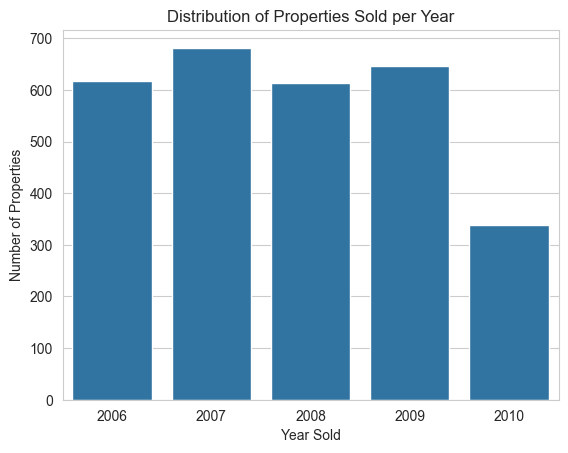

In [109]:
# Year Sold
sns.countplot(data=new_df, x="Yr_Sold")
plt.title("Distribution of Properties Sold per Year")
plt.xlabel("Year Sold")
plt.ylabel("Number of Properties");

From the graph above, we can see that the number of properties sold in 2007 was the highest, followed by 2009 and 2006. We can also see that the number of properties sold in 2010 was the lowest. This could be due to the financial crisis that occurred in 2008 and the effects of it were still being felt in 2010. However, validating this claim is outside the scope of this project and will not be pursued further.

It would be interesting tos see which month per year had the highest number of properties sold and if occurred around the same time every year. We will look at this in the bivariate analysis section of the report.

Summary statistics:
count    2899.000000
mean       36.430148
std        30.331687
min         0.000000
25%         7.000000
50%        34.000000
75%        55.000000
max       136.000000
Name: House_Sale_Age, dtype: float64


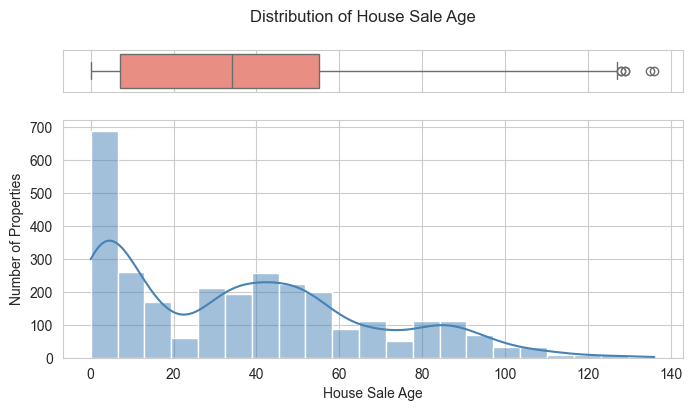

In [110]:
# House Sale Age

plot_dist(new_df, columns="House_Sale_Age", title="Distribution of House Sale Age",
          xlabel="House Sale Age", ylabel="Number of Properties")

From the graph above, we can see that the graph is skewed to the right and has more than 1 peak, one dominant one at 0 years and another around 40 years. Looking at the summary statistics we can see that the average age of a house at the time of sale is 36 years. We can also see that the oldest house was sold at 136 years old and the youngest house was sold at 0 years old.

Summary statistics:
count      2899.000000
mean     179556.969645
std       77331.978557
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213000.000000
max      615000.000000
Name: SalePrice, dtype: float64


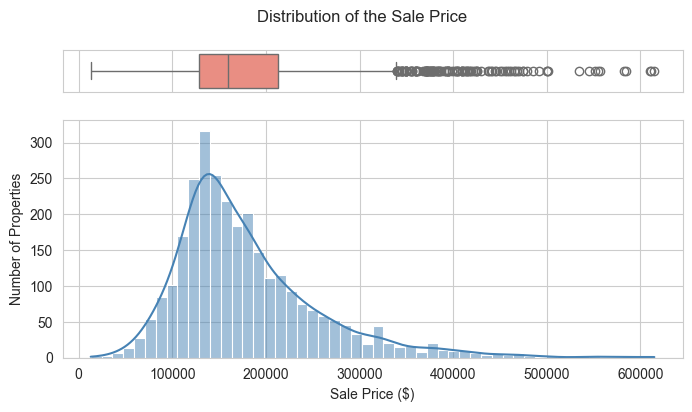

In [112]:
# Sale Price

plot_dist(new_df, columns="SalePrice", title="Distribution of the Sale Price",
          xlabel="Sale Price ($)", ylabel="Number of Properties")

This is one of the most important columns in the dataset as we can see how much each property was sold for. 
Looking at the graph above, we can also see that the distribution is skewed to the right and most properties were sold for an average price of 180,000 and the median price was 160,000.
We can also see that the most expensive property was sold for 615,000 while the cheapest property was sold for 12,789.

#### 4.1.2 Categorical variables

This section of the report will look at the distribution of the categorical variables within the dataset.


In [114]:
for column, label in new_df.items():
    if pd.api.types.is_object_dtype(label):
        print(column)

MS_Zoning
Neighborhood
Bldg_Type
House_Style
Mo_Sold


There are only 5 categorical columns within the dataset. We will look at the distribution of each column individually and derive any meaningful insights from them.

## References

BecomingHuman.ai (2020) Outlier detection in real estate data, Medium. Available at: https://becominghuman.ai/outlier-detection-in-real-estate-data-4e7375e2c8ba (Accessed: 05 November 2023). 

Kumar, A. (2023) Python - replace missing values with mean, median &amp; mode, Analytics Yogi. Available at: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/ (Accessed: 11 November 2023). 

Whitegates (2022) 7 things your estate agent will look for when valuing your home, Whitegates. Available at: https://www.whitegates.co.uk/news/seven-things-your-estate-agent-will-look-for-when-valuing-your-home-8228 (Accessed: 15 November 2023). 

